In [37]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import os
from nitorch.tools.registration import pairwise as pw, losses, optim

home = os.environ['HOME']
root = f'{home}/Dropbox/data/register'
fname_mov = f'{root}/mtw.nii'
fname_fix = f'{root}/pdw.nii'

In [119]:
# Load and preprocess images

levels = pw.prepare_pyramid_levels([fname_fix, fname_mov], levels=[0, 1, 2])

mov, mov_mask, mov_aff = pw.preproc_image(fname_mov)
fix, fix_mask, fix_aff = pw.preproc_image(fname_fix)

mov = pw.make_image(mov, mov_mask, mov_aff, pyramid=levels[0])
fix = pw.make_image(fix, fix_mask, fix_aff, pyramid=levels[1])

# Note that at this point, each image is a Gaussian pyramid

In [123]:
# Similarity metric
sim = pw.Similarity(losses.CC(), mov, fix)

# Transformation model and optimizer
aff_model = pw.make_affine('rigid')
aff_optim = pw.make_affine_optim('newton', tolerance=1e-2)
nl_model = pw.make_nonlin(list(sim.images()), 'svf', factor=10)
nl_optim = pw.make_nonlin_optim('newton', tolerance=1e-2)

<IPython.core.display.Javascript object>


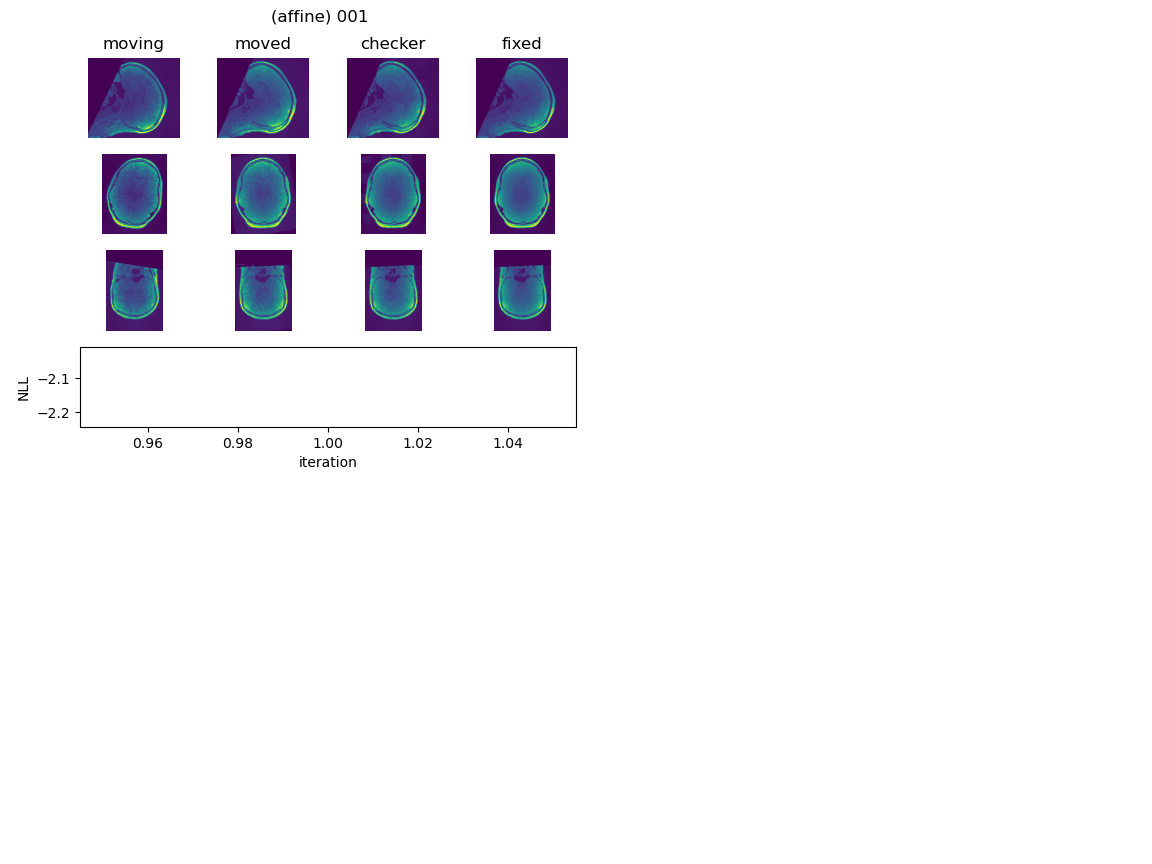

In [124]:
import matplotlib.pyplot as plt
fig = plt.figure()

In [ ]:
# Run
# but first, we need to convert our similarity over image pyramids into
# a list of similarities at each pyramid level

simpyr = pw.sequential_pyramid(sim)
aff_model, _ = pw.run(simpyr, aff_model, nl_model, 
                      affine_optim=aff_optim, nonlin_optim=nl_optim,
                      pyramid=True, verbose=3, figure=fig, tolerance=1e-2)



-----------------------------------------------------------------------------------------
   PYRAMID LEVEL 2
-----------------------------------------------------------------------------------------
CC(
    moving=Image(shape=[70, 80, 56], voxel_size=[3.2, 3.2, 3.2], bound=zero, extrapolate=True, masked=True), 
    fixed=Image(shape=[70, 80, 56], voxel_size=[3.2, 3.2, 3.2], bound=zero, extrapolate=True, masked=True))
AffineModel(log=LogAffine(shape=[6], dim=3), basis=rigid, factor=1, position=symmetric)
SVFModel(velocity=Displacement(shape=[70, 80, 56], voxel_size=[3.3, 3.2, 3.3]), factor=10, absolute=0.0001, membrane=0.001, bending=0.2, lame=(0.05, 0.2), factor=10)
InterleavedOptimIterator(max_iter=10, tol=0.01, stop=gain) o [GaussNewton(lr=1, ls=StrongWolfeLineSearch(lr=1, c1=0, c2=0.9, max_iter=25), iter=OptimIterator(max_iter=50, tol=0.01, stop=diff))                                                              ,
GridCG(lr=1, fmg=2)]

step     | it  |     fit      +    nonlin    + 

CC(
    moving=Image(shape=[280, 320, 224], voxel_size=[0.8, 0.8, 0.8], bound=zero, extrapolate=True, masked=True), 
    fixed=Image(shape=[280, 320, 224], voxel_size=[0.8, 0.8, 0.8], bound=zero, extrapolate=True, masked=True))
AffineModel(log=LogAffine(shape=[6], dim=3), basis=rigid, factor=1, position=symmetric)
SVFModel(velocity=Displacement(shape=[282, 321, 225], voxel_size=[0.81, 0.8, 0.8]), factor=10, absolute=0.0001, membrane=0.001, bending=0.2, lame=(0.05, 0.2), factor=10)
InterleavedOptimIterator(max_iter=10, tol=0.01, stop=gain) o [GaussNewton(lr=1, ls=StrongWolfeLineSearch(lr=1, c1=0, c2=0.9, max_iter=25), iter=OptimIterator(max_iter=50, tol=0.01, stop=diff))                                                              ,
GridCG(lr=1, fmg=2)]

step     | it  |     fit      +    nonlin    +    affine    =     obj      |     gain    
-----------------------------------------------------------------------------------------
(nonlin) | 000 |     -2.39246 +      0.26646 +          

In [17]:
aff_model.dat.dat

tensor([-3.6544e-09,  1.2237e-07, -4.1034e-07, -1.0023e-08,  3.3059e-08,
        -1.1058e-06])